### XGBoost实战应用

#### 方式一

In [1]:
import numpy as np
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn import datasets
from sklearn import tree
from sklearn.model_selection import train_test_split
X,y = datasets.load_wine(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [3]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [2]:
model = XGBClassifier(learning_rate =0.1,# 学习率，控制每次迭代更新权重时的步长，默认0.3。值越小，训练越慢。
                      n_estimators=10,# 总共迭代的次数，即决策树的个数
                      max_depth=5, # 深度
                      min_child_weight= 1,# 默认值为1,。值越大，越容易欠拟合；值越小，越容易过拟合
                      gamma=0.3,# 惩罚项系数，指定节点分裂所需的最小损失函数下降值。
                      subsample=0.8,# 训练每棵树时，使用的数据占全部训练集的比例。默认值为1，典型值为0.5-1。防止overfitting。
                      colsample_bytree=0.8,
                      objective= 'binary:logistic',# 目标函数
                      eval_metric = ['merror'],# 验证数据集评判标准
                      nthread=4,)# 并行线程数
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['merror'], gamma=0.3,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, n_estimators=10, n_jobs=None,
              nthread=4, num_parallel_tree=None, predictor=None,
              random_state=None, reg_alpha=None, ...)

In [8]:
eval_set = [(X_test, y_test),(X_train,y_train)]
# 建模
model.fit(X_train,y_train,
          eval_set = eval_set,
          verbose = True)

model.score(X_test,y_test)

[0]	validation_0-merror:0.00000	validation_1-merror:0.00704
[1]	validation_0-merror:0.00000	validation_1-merror:0.00000
[2]	validation_0-merror:0.00000	validation_1-merror:0.00000
[3]	validation_0-merror:0.00000	validation_1-merror:0.00000
[4]	validation_0-merror:0.00000	validation_1-merror:0.00000
[5]	validation_0-merror:0.00000	validation_1-merror:0.00000
[6]	validation_0-merror:0.00000	validation_1-merror:0.00000
[7]	validation_0-merror:0.00000	validation_1-merror:0.00000
[8]	validation_0-merror:0.00000	validation_1-merror:0.00000
[9]	validation_0-merror:0.00000	validation_1-merror:0.00000


1.0

In [11]:
model.predict(X_test)

array([1, 0, 0, 1, 1, 2, 1, 2, 2, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 0, 1, 0, 0, 2, 1, 2, 1, 1], dtype=int64)

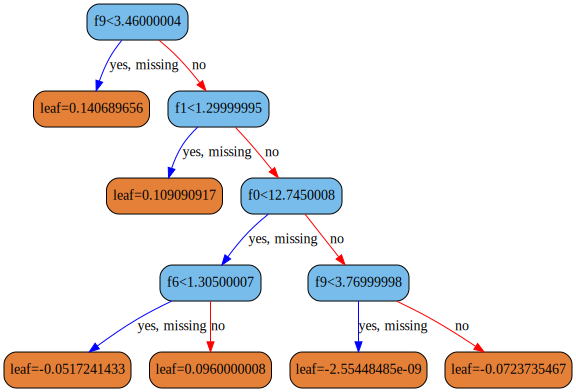

In [10]:
xgb.to_graphviz(model,num_trees=1,
                condition_node_params={'shape': 'box',
                                       'style': 'filled,rounded',
                                       'fillcolor': '#78bceb'},
                leaf_node_params={'shape': 'box',
                                  'style': 'filled,rounded',
                                  'fillcolor': '#e48038'})

#### 方式二

In [16]:
X,y = datasets.load_wine(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

param = {'learning_rate':0.1,
         'n_estimators':10000,
         'max_depth':5,
         'min_child_weight':1,
         'gamma':0.3,
         'subsample':0.8,
         'colsample_bytree':0.8, 
         'verbosity':0,
         'objective':'multi:softprob',
         'eval_metric':'merror',
         'early_stopping_rounds':20}


model = xgb.XGBClassifier(**param)
model.fit(X_train, y_train,eval_set=[(X_test, y_test)])
model.score(X_test,y_test)

[0]	validation_0-merror:0.11111
[1]	validation_0-merror:0.05556
[2]	validation_0-merror:0.02778
[3]	validation_0-merror:0.02778
[4]	validation_0-merror:0.00000
[5]	validation_0-merror:0.00000
[6]	validation_0-merror:0.00000
[7]	validation_0-merror:0.00000
[8]	validation_0-merror:0.00000
[9]	validation_0-merror:0.00000
[10]	validation_0-merror:0.00000
[11]	validation_0-merror:0.00000
[12]	validation_0-merror:0.00000
[13]	validation_0-merror:0.00000
[14]	validation_0-merror:0.00000
[15]	validation_0-merror:0.00000
[16]	validation_0-merror:0.00000
[17]	validation_0-merror:0.00000
[18]	validation_0-merror:0.00000
[19]	validation_0-merror:0.00000
[20]	validation_0-merror:0.00000
[21]	validation_0-merror:0.00000
[22]	validation_0-merror:0.00000
[23]	validation_0-merror:0.00000
[24]	validation_0-merror:0.00000


1.0

#### 方式三

In [19]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn import datasets
X,y = datasets.load_wine(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# 创建数据
dtrain = xgb.DMatrix(data = X_train,label = y_train)
dtest = xgb.DMatrix(data = X_test,label = y_test)

# 指定参数
param = {'learning_rate':0.1,
         'max_depth':5,
         'min_child_weight':1,
         'gamma':0.3,
         'subsample':0.8,
         'eval_metric':['merror','mlogloss'],
         'colsample_bytree':0.1, 
         'verbosity':0,
         'objective':'multi:softmax',
         'num_class':3}
num_round = 1000
evals = [(dtrain,'train'),(dtest,'eval')]

model = xgb.train(param,
                dtrain,
                num_round,
                evals = evals,
                early_stopping_rounds=10)
# 进行预测
y_ = model.predict(dtest)
display(y_,accuracy_score(y_test,y_))

[0]	train-merror:0.05634	train-mlogloss:1.02412	eval-merror:0.05556	eval-mlogloss:1.02368
[1]	train-merror:0.04225	train-mlogloss:0.94304	eval-merror:0.02778	eval-mlogloss:0.94459
[2]	train-merror:0.02817	train-mlogloss:0.88817	eval-merror:0.00000	eval-mlogloss:0.90440
[3]	train-merror:0.01408	train-mlogloss:0.84085	eval-merror:0.02778	eval-mlogloss:0.86896
[4]	train-merror:0.04225	train-mlogloss:0.80574	eval-merror:0.00000	eval-mlogloss:0.85011
[5]	train-merror:0.02113	train-mlogloss:0.77590	eval-merror:0.00000	eval-mlogloss:0.82568
[6]	train-merror:0.03521	train-mlogloss:0.74135	eval-merror:0.02778	eval-mlogloss:0.80935
[7]	train-merror:0.03521	train-mlogloss:0.70679	eval-merror:0.02778	eval-mlogloss:0.78098
[8]	train-merror:0.02113	train-mlogloss:0.67124	eval-merror:0.00000	eval-mlogloss:0.74606
[9]	train-merror:0.01408	train-mlogloss:0.63086	eval-merror:0.00000	eval-mlogloss:0.70433
[10]	train-merror:0.01408	train-mlogloss:0.60592	eval-merror:0.00000	eval-mlogloss:0.68848
[11]	trai

[91]	train-merror:0.00000	train-mlogloss:0.08351	eval-merror:0.00000	eval-mlogloss:0.14638
[92]	train-merror:0.00000	train-mlogloss:0.08253	eval-merror:0.00000	eval-mlogloss:0.14351
[93]	train-merror:0.00000	train-mlogloss:0.08109	eval-merror:0.00000	eval-mlogloss:0.14097
[94]	train-merror:0.00000	train-mlogloss:0.08064	eval-merror:0.00000	eval-mlogloss:0.14053
[95]	train-merror:0.00000	train-mlogloss:0.08003	eval-merror:0.00000	eval-mlogloss:0.13884
[96]	train-merror:0.00000	train-mlogloss:0.07853	eval-merror:0.00000	eval-mlogloss:0.13831
[97]	train-merror:0.00000	train-mlogloss:0.07738	eval-merror:0.00000	eval-mlogloss:0.13711
[98]	train-merror:0.00000	train-mlogloss:0.07618	eval-merror:0.00000	eval-mlogloss:0.13517
[99]	train-merror:0.00000	train-mlogloss:0.07529	eval-merror:0.00000	eval-mlogloss:0.13305
[100]	train-merror:0.00000	train-mlogloss:0.07433	eval-merror:0.00000	eval-mlogloss:0.13204
[101]	train-merror:0.00000	train-mlogloss:0.07432	eval-merror:0.00000	eval-mlogloss:0.131

[181]	train-merror:0.00000	train-mlogloss:0.03799	eval-merror:0.00000	eval-mlogloss:0.07449
[182]	train-merror:0.00000	train-mlogloss:0.03799	eval-merror:0.00000	eval-mlogloss:0.07461
[183]	train-merror:0.00000	train-mlogloss:0.03799	eval-merror:0.00000	eval-mlogloss:0.07456
[184]	train-merror:0.00000	train-mlogloss:0.03799	eval-merror:0.00000	eval-mlogloss:0.07459
[185]	train-merror:0.00000	train-mlogloss:0.03751	eval-merror:0.00000	eval-mlogloss:0.07447
[186]	train-merror:0.00000	train-mlogloss:0.03669	eval-merror:0.00000	eval-mlogloss:0.07434
[187]	train-merror:0.00000	train-mlogloss:0.03598	eval-merror:0.00000	eval-mlogloss:0.07336
[188]	train-merror:0.00000	train-mlogloss:0.03563	eval-merror:0.00000	eval-mlogloss:0.07282
[189]	train-merror:0.00000	train-mlogloss:0.03523	eval-merror:0.00000	eval-mlogloss:0.07251
[190]	train-merror:0.00000	train-mlogloss:0.03523	eval-merror:0.00000	eval-mlogloss:0.07247
[191]	train-merror:0.00000	train-mlogloss:0.03523	eval-merror:0.00000	eval-mlogl

[271]	train-merror:0.00000	train-mlogloss:0.02823	eval-merror:0.00000	eval-mlogloss:0.06042
[272]	train-merror:0.00000	train-mlogloss:0.02823	eval-merror:0.00000	eval-mlogloss:0.06040
[273]	train-merror:0.00000	train-mlogloss:0.02823	eval-merror:0.00000	eval-mlogloss:0.06048
[274]	train-merror:0.00000	train-mlogloss:0.02823	eval-merror:0.00000	eval-mlogloss:0.06043
[275]	train-merror:0.00000	train-mlogloss:0.02823	eval-merror:0.00000	eval-mlogloss:0.06058
[276]	train-merror:0.00000	train-mlogloss:0.02823	eval-merror:0.00000	eval-mlogloss:0.06062
[277]	train-merror:0.00000	train-mlogloss:0.02823	eval-merror:0.00000	eval-mlogloss:0.06052
[278]	train-merror:0.00000	train-mlogloss:0.02823	eval-merror:0.00000	eval-mlogloss:0.06055
[279]	train-merror:0.00000	train-mlogloss:0.02823	eval-merror:0.00000	eval-mlogloss:0.06067
[280]	train-merror:0.00000	train-mlogloss:0.02798	eval-merror:0.00000	eval-mlogloss:0.06070
[281]	train-merror:0.00000	train-mlogloss:0.02798	eval-merror:0.00000	eval-mlogl

array([1., 1., 2., 1., 0., 1., 2., 1., 1., 1., 2., 1., 2., 0., 0., 1., 0.,
       0., 2., 1., 1., 1., 2., 1., 0., 2., 0., 0., 1., 1., 1., 1., 2., 2.,
       0., 1.], dtype=float32)

1.0